<a href="https://colab.research.google.com/github/valmyr/CIRCUITOS-I/blob/main/C%C3%B3pia_de_Exerc_01_circuitos_i_3_unidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
#https://tinyurl.com/26pzqby7
import sys
import os

if(os.path.isdir(r'/content/ElectricCircuits/Jupyter notebooks/') == False):
    sys.path.insert(0, '/content/ElectricCircuits/Jupyter notebooks/')
    !git clone https://github.com/edsonportosilva/ElectricCircuits.git

In [55]:
import sympy as sp
import numpy as np
from matplotlib.pyplot import plot as plt
from utils import round_expr, symdisp, symplot
from sympy.polys.partfrac import apart
bt = np.arange(-0.1,1,(10**-3)/10)

In [56]:
sp.init_printing()
# transformada de Laplace
def L(f,t,s):
    return sp.laplace_transform(f, t, s, noconds=True)

# transformada inversa de Laplace
def invL(F,s,t):
    return sp.re(sp.inverse_laplace_transform(F, s, t, noconds=True))

# funções para auxílio na expansão em frações parciais
def adjustCoeff(expr):    
    coeff = expr.as_numer_denom()
    c0 = sp.poly(coeff[1].cancel()).coeffs()[0]
    
    return (coeff[0].cancel()/c0)/(coeff[1].cancel()/c0)

def partFrac(expr, Ndigits):
    expr = expr.cancel()
    expr = apart(adjustCoeff(expr), s, full=True).doit()
    
    return sp.N(expr, Ndigits)

In [57]:
matricula = [1,1,0]
R1 = matricula[0]+1
R2 = matricula[1]+1
R3 = matricula[2]+1
print(f'R1 = {R1} ohms.')
print(f'R2 = {R2} ohms.')
print(f'R3 = {R3} ohms.')

R1 = 2 ohms.
R2 = 2 ohms.
R3 = 1 ohms.


In [58]:
#Definição das variáveis do tipo símbolicas para o método das tensões de nó
#Item C
X,Y,Z,VC,s,t = sp.symbols('X,Y,Z,Vc,s,t')
I1,I2,I3,IC,IL1,IL2 = sp.symbols('I_1,I_2,I_3,I_C,I_L1,I_L2')

In [59]:
I1  = -(X-100/s)/(2*R2)
I2  =  (X-Y)/(2*R1)
I3  =  Y/R1
IL1 =  (Y-Z)/(0.4*s) 
IL2 =  (Z+1)/(s+2*R3)
IC = (X-Z-10/s)/(4000/s)
Eq1 = sp.Eq(I1,I2+IC).simplify()    #Equação nó X
Eq2 = sp.Eq(I2,I3+IL1).simplify()   #Equação nó Y
Eq3 = sp.Eq(IL2,IC+IL1).simplify()  #Equação nó Z

In [60]:
Eq1

In [61]:
Eq2

In [62]:
Eq3

In [63]:
sol = sp.solve([Eq1,Eq2,Eq3],[X,Y,Z],dict= True)[0] # resolução do sistema linear

In [64]:
symdisp('X(s) = ',sol[X],'Vs') #Valor de tensão do nó X no domínio da frequência

<IPython.core.display.Math object>

In [65]:
symdisp('Y(s) = ',sol[Y],'Vs') #Valor de tensão do nó Y no domínio da frequência

<IPython.core.display.Math object>

In [66]:
symdisp('Z(s) = ',sol[Z],'Vs') #Valor de tensão do nó Z no domínio da frequência

<IPython.core.display.Math object>

In [67]:
IL1 = IL1.subs({X:sol[X],Y:sol[Y],Z:sol[Z]}).simplify()# Corrente no indutor L1 = 0,4H pelo método das tensões de nó
IL2 = IL2.subs({X:sol[X],Y:sol[Y],Z:sol[Z]}).simplify()# Corrente no indutor L2 = 1H pelo método das tensões de nó
VC = (sol[X]-sol[Z]).simplify()# Tensão no capacitor C = 250uF pelo método das tensões de nó

In [68]:
symdisp('V_c(0^+) = ',sp.limit(s*VC,s,sp.oo),'V')
symdisp('I_{L1}(0^+) = ',sp.limit(s*IL1,s,sp.oo),'A')
symdisp('I_{L2}(0^+) = ',sp.limit(s*IL2,s,sp.oo),'A')
print()
symdisp('V_c(+\infty) = ',round_expr(sp.limit(s*VC,s,0),3),'V')
symdisp('I_{L1}(+\infty) = ',round_expr(sp.limit(s*IL1,s,0),3),'A')
symdisp('I_{L2}(+\infty) = ',round_expr(sp.limit(s*IL2,s,0),3),'A')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [69]:
symdisp('V_c(s) = ', VC, 'Vs')

<IPython.core.display.Math object>

In [70]:
symdisp('I_{L1}(s) = ', IL1, 'As')

<IPython.core.display.Math object>

In [71]:
symdisp('I_{L2}(s) = ', IL2, 'As')

<IPython.core.display.Math object>

In [72]:
#Definição das variáveis do tipo símbolicas para o método das correntes de malha
#Item D
Ia,Ib,Ic = sp.symbols('I_a,I_b,I_c')
Eq1 = sp.Eq(2*R2*Ia-(100/s)+2*R1*(Ia-Ib)+R1*(Ia-Ic), 0).simplify()
Eq2 = sp.Eq(-R1*(Ia-Ic)+(0.4*s)*(Ic-Ib)+s*Ic-1+2*R3*Ic,0).simplify()
Eq3 = sp.Eq((4000/s)*Ib+10/s-0.4*s*(Ic-Ib)-2*R1*(Ia-Ib),0).simplify()

In [73]:
Eq1

In [74]:
Eq2

In [75]:
Eq3

In [76]:
sol_malha = sp.solve([Eq1,Eq2,Eq3],[Ia,Ib,Ic],dict= True)[0]

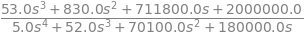

In [77]:
sol_malha[Ia] #Valor de corrente na malha 1 no domínio da frequência

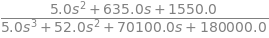

In [78]:
sol_malha[Ib]#Valor de corrente na malha 2 no domínio da frequência

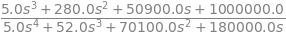

In [79]:
sol_malha[Ic]#Valor de corrente na malha 3 no domínio da frequência

In [80]:
VC_malha = ((4000/s)*sol_malha[Ib]+10/s).simplify() #Corrente no indutor L1 = 0,4H pelo método das correntes de malha
IL1_malha = (sol_malha[Ic]-sol_malha[Ib]).simplify()# #Corrente no indutor L1 = 0,4H pelo método das correntes de malha
IL2_malha  = sol_malha[Ic].simplify()#Tensão no capacitor C = 250uF pelo método das tensões de nó

In [81]:
symdisp('V_c(s) = ', VC, 'Vs')
symdisp('I_{L1}(s) = ', IL1, 'As')
symdisp('I_{L2}(s) = ', IL2, 'As')
print()
if(VC_malha == VC and IL1 == IL1_malha and IL2 == IL2_malha):
    print("Resultado consistênte")
else:
    print("Resultado Inconsistênte")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Resultado consistênte


In [82]:
vc = (44.44+1.11*sp.exp(-2.57*t)+sp.exp(-3.91*t)*(-35.56*sp.cos(118.26*t)+23.68*sp.sin(118.26*t)))*sp.Heaviside(t)
il1 = (5.56 - 4.84*sp.exp(-2.57*t)+sp.exp(-3.91*t)*(-0.71*sp.cos(118.26*t)-.73*sp.sin(118.26*t)))*sp.Heaviside(t)
il2 = (5.56 - 4.84*sp.exp(-2.57*t)+sp.exp(-3.91*t)*(0.22*sp.cos(118.26*t)+.28*sp.sin(118.26*t)))*sp.Heaviside(t)
symdisp('V_c(t) = ', vc, 'Vs')
symdisp('I_{L1}(t) = ', il1, 'As')
symdisp('I_{L2}(t) = ', il2, 'As')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

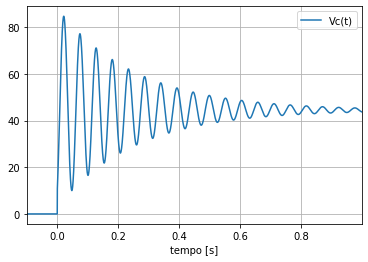

In [83]:
symdisp('Vc(t) = ',vc,'Vs')
symplot(t,vc,bt,'Vc(t)')

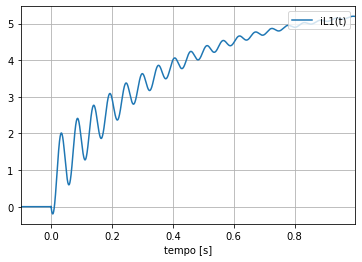

In [84]:
symplot(t,il1,bt,'iL1(t)')

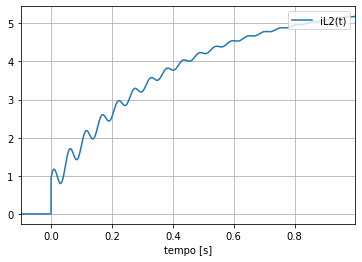

In [85]:
symplot(t,il2,bt,'iL2(t)')